In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('master_data_clean.csv').drop(columns=['Agency_Type_grouped'])

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
target_column = 'Weapon Category'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)



Accuracy: 0.66

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     30901
           1       0.48      0.60      0.53     15159

    accuracy                           0.66     46060
   macro avg       0.63      0.64      0.63     46060
weighted avg       0.68      0.66      0.66     46060



In [16]:
confusion_matrix(y_test, y_pred)

array([[21140,  9761],
       [ 6098,  9061]])

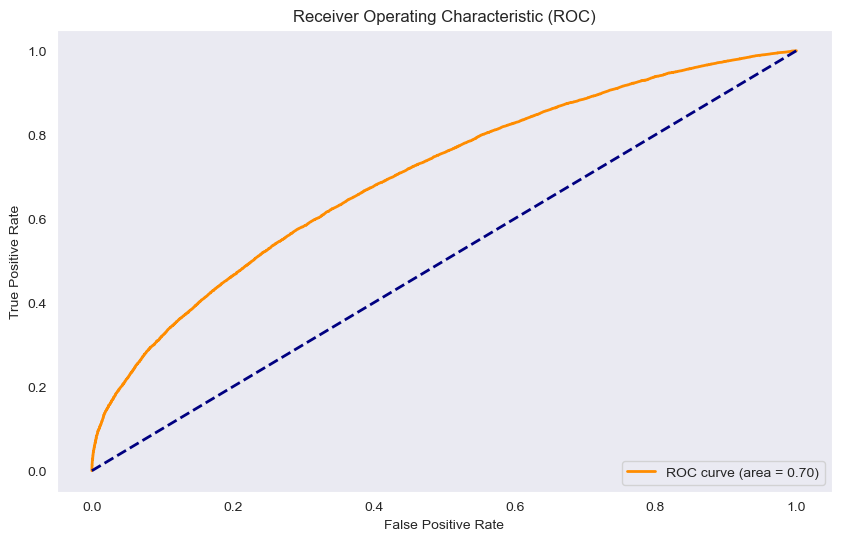

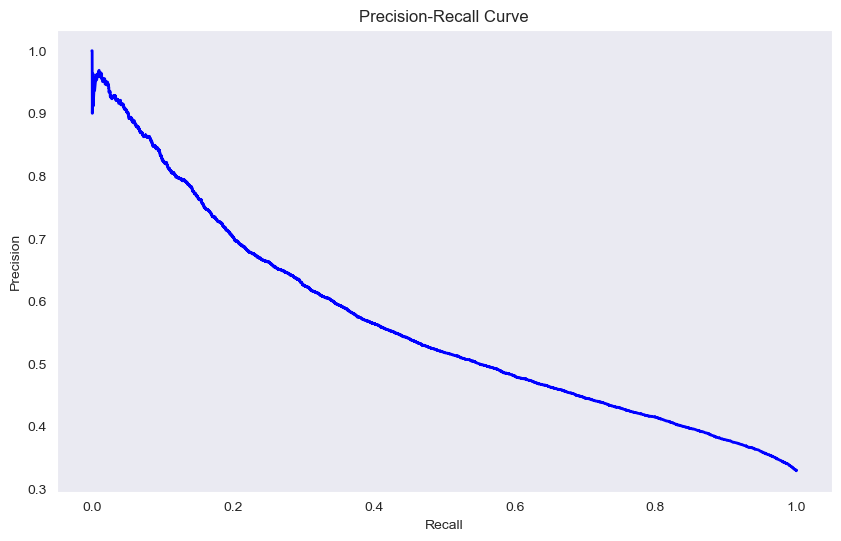

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
# Calculate probabilities for ROC and precision-recall curves
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())


# Calculate scale_pos_weight
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42, scale_pos_weight=scale_pos_weight)
# Step 3: Train the XGBoost classifier
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate on the test set
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))


Weapon Category
1    72103
0    72103
Name: count, dtype: int64
Accuracy: 0.6543421623968736
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     30901
           1       0.48      0.58      0.53     15159

    accuracy                           0.65     46060
   macro avg       0.63      0.64      0.63     46060
weighted avg       0.68      0.65      0.66     46060



In [23]:
confusion_matrix(y_test, y_pred)

array([[21309,  9592],
       [ 6329,  8830]])

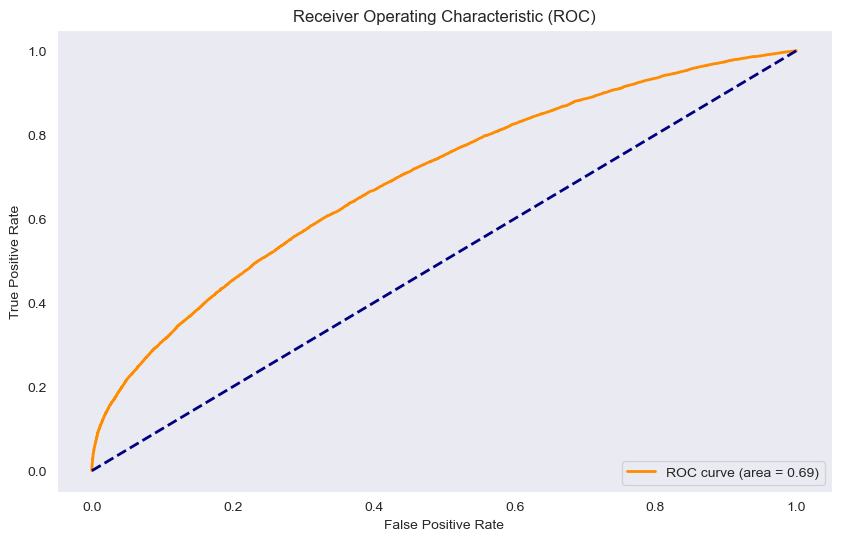

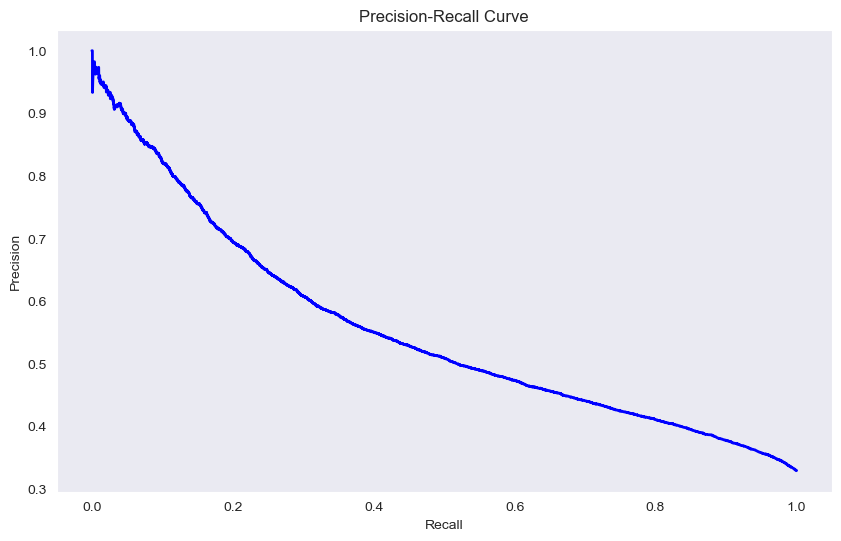

In [21]:
# Calculate probabilities for ROC and precision-recall curves
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [25]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42)
# Step 3: Train the XGBoost classifier
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate on the test set
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     30901
           1       0.48      0.58      0.52     15159

    accuracy                           0.65     46060
   macro avg       0.62      0.64      0.63     46060
weighted avg       0.67      0.65      0.66     46060

